Finalizando a classe Valor
==========================



## Introdução



Chegou a hora de finalizar a classe `Valor`!



## Objetivo



O objetivo é fazer com que a classe `Valor` seja capaz de realizar algumas operações necessárias para que seja usada na nossa rede neural artificial.



## Importações



In [133]:
import math
from funcoes import plota_grafo 

## Código e discussão



### Finalizando a classe `Valor`



Aqui está a classe `Valor` assim como feita na aula anterior. Vamos modificá-la para cumprir nossos objetivos (ver objetivos na próxima seção).



In [134]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_adicao():
            self.grad += saida.grad * 1
            outro_valor.grad += saida.grad * 1

        saida.propagar = propagar_adicao

        return saida
    
    def __radd__(self, outro_valor): # outro_valor + self
        return self + outro_valor


    def __mul__(self, outro_valor):
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_multiplicacao():
            self.grad += saida.grad * outro_valor.data
            outro_valor.grad += saida.grad * self.data

        saida.propagar = propagar_multiplicacao

        return saida
    
    def __rmul__(self,outro_valor): # outro_valor * self
        return self * outro_valor
    
    def propagar(self):
        pass

    def propagar_tudo(self):
        ordem_topologica = []
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)

        self.grad = 1  # o gradiente do vértice folha deve ser 1

        for v in reversed(ordem_topologica):
            v.propagar()
            
            
    def exp(self):
        data = math.exp(self.data)
        progenitor = (self, )
        operador_mae = "exp"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_exp():
            self.grad += saida.grad * data

        saida.propagar = propagar_exp

        return saida 
    
    def __pow__(self, expoente): # self ** expoente
        
        assert isinstance(expoente, (int, float))
        data = self.data ** expoente
        progenitor = (self, )
        operador_mae = f"**{expoente}"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_exponenciacao():
            self.grad += saida.grad * expoente * (self.data ** (expoente - 1))

        saida.propagar = propagar_exponenciacao

        return saida
    
    def __truediv__(self, outro_valor): # self / outro valor
        return self * outro_valor ** (-1)
    
    def __neg__(self): # - self
        return self * (-1)
    
    def __sub__(self, outro_valor): # self - outro_valor
        return self + (-outro_valor)
    
    def __rsub__(self, outro_valor): # outro_valor - self
        return self * (-1) + outro_valor
    
    def sig(self):
        return self.exp() / (self.exp() + 1) 

### Objetivos a serem cumpridos



Quero poder acidionar uma instância de `Valor` com uma constante qualquer.



In [135]:
a = Valor(10, rotulo="a")
b = a + 1
print(b)

Valor(data=11)


Quero poder multiplicar uma instância de `Valor` com uma constante qualquer.



In [136]:
a = Valor(10, rotulo="a")
b = a * 10
print(b)

Valor(data=100)


Quero poder acidionar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



In [137]:
a = Valor(10, rotulo="a")
b = 1 + a
print(b)

Valor(data=11)


Quero poder multiplicar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



In [138]:
a = Valor(10, rotulo="a")
b = 10 * a
print(b)

Valor(data=100)


Quero poder aplicar a função exponencial ($e^x$) em uma instância de `Valor`, computando corretamente o gradiente local desta operação.



In [139]:
a = Valor(1, rotulo="a")
b = a.exp()
print(b)

Valor(data=2.718281828459045)


Quero poder elevar uma instância de `Valor` a um número real qualquer. **Nota**: não vai funcionar se fizer um `Valor` elevado a outro `Valor` pois vamos propagar os gradientes apenas considerando que estamos elevando a uma constante qualquer.



In [140]:
a = Valor(10, rotulo="a")
b = a**2
print(b)

Valor(data=100)


Quero poder dividir uma instância de `Valor` por outra instância de `Valor`.



Valor(data=0.5)


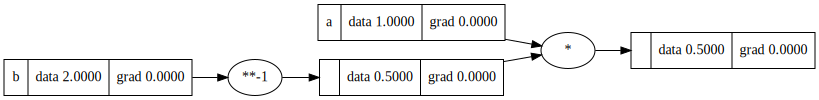

In [141]:
a = Valor(1, rotulo="a")
b = Valor(2, rotulo="b")
c = a / b
print(c)

plota_grafo(c)

Quero poder computar o negativo de uma instância de `Valor`.



In [142]:
a = Valor(1, rotulo="a")
b = -a
print(b)

Valor(data=-1)


Quero poder subtrair uma instância de `Valor` por outra instância de `Valor`.



In [143]:
a = Valor(10, rotulo="a")
b = Valor(3, rotulo="b")
c = a - b
print(c)

Valor(data=7)


E, finalmente, quero poder aplicar a função sigmoide (também conhecida como logística) a uma instância de `Valor`. A função sigmoide é a seguinte:

$$
S(x) = \frac{e^x}{e^x + 1}
$$



Valor(data=0.7310585786300048)


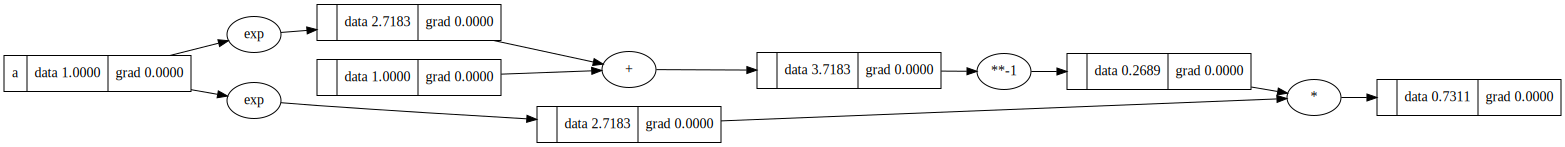

In [144]:
a = Valor(1, rotulo="a")
b = a.sig()
print(b)

plota_grafo(b)

## Conclusão



O objetivo do presente notebook (**experimento R.04**) é fazer com que a classe `Valor` seja capaz de realizar algumas operações necessárias para que seja usada na nossa rede neural artificial. Assim, no decorrer do material é apresentada classe `Valor` e tem-se como finalidade torná-la capaz de realizar operações necessárias para ser usada durante uma rede neural. Portanto, a classe `Valor` é uma implementação que representa valores numéricos e permite operações como adição, multiplicação, exponenciação, divisão e as mesmas em ordem invertida, além de conseguir a aplicação da função sigmoide.

Após compreender como utilizar a classe `Valor` foi necessário realizar alguns objetivos, estes que incluem a capacidade de adicionar ou multiplicar uma instância da classe com uma constante, realizar as mesmas operações na ordem oposta, aplicar a função exponencial corretamente considerando o gradiente, elevar uma instância de `Valor` a um número real, dividir uma instância, também da classe, por outra, e aplicar a função sigmoide.

Cabe salientar a importância desses objetivos na visão de uma aplicação em uma rede neural artificial. Assim, são importantes pois muitas operações matemáticas são realizadas nessas redes, como soma ponderada, multiplicação por pesos, cálculos de ativação e propagação de gradientes. Portanto, ao implementar a classe `Valor` com essas funcionalidades, torna-se possível utilizá-la como base para construir uma rede neural artificial mais completa. Desse modo, essa abordagem permite realizar cálculos matemáticos e propagar gradientes de forma eficiente, assim como foi solicitado em **objetivos** e contribuindo para o desenvolvimento e estudo de redes neurais, corroborando com o que é proposto na disciplina.

## Playground

